**Data Visualization Codes**

This visual analysis identifies how socioeconomic, financial, and behavioral factors affect customer subscription success.

Prepared by,
Fatma Seyhan, Işılsu Arslan, Bahar Acar and Özge Özlü.

1. How do age and education level influence customer subscription success?

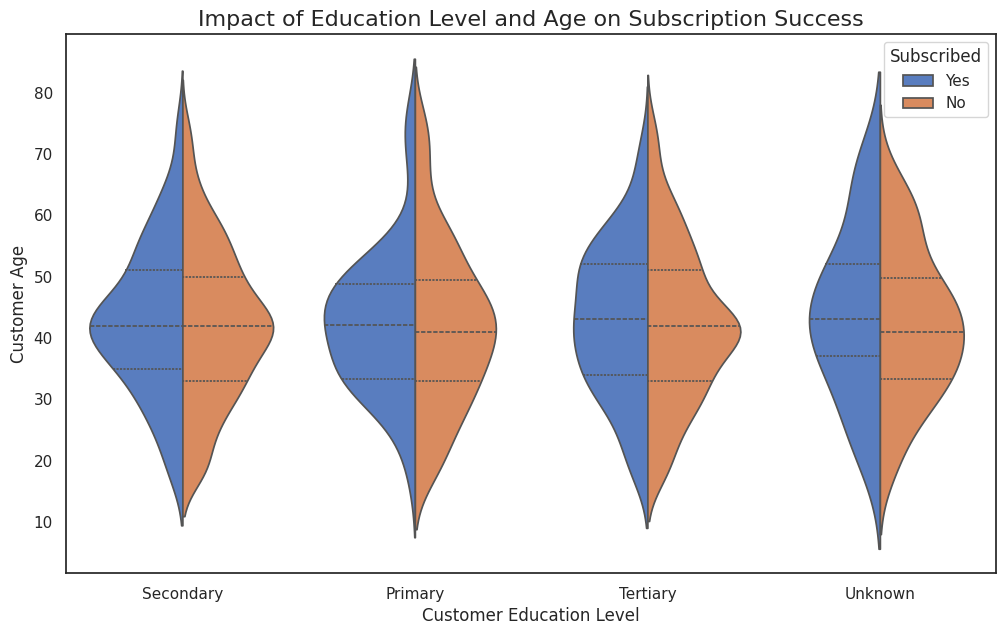

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1: Load the cleaned dataset
df = pd.read_csv('cleaned_marketing_data.csv')

#2: Set the style for the report
sns.set_theme(style="white")
plt.figure(figsize=(12, 7))

#3: Create the visualization
df['Subscribed'] = df['Subscribed'].replace({0: 'No', 1: 'Yes'})

sns.violinplot(
    data=df,
    x='Education',
    y='Age',
    hue='Subscribed',
    split=True,
    palette="muted",
    inner="quart")

#4: Add titles and labels
plt.title('Impact of Education Level and Age on Subscription Success', fontsize=16)
plt.xlabel('Customer Education Level', fontsize=12)
plt.ylabel('Customer Age', fontsize=12)

#5: Show the final plot
plt.legend(title='Subscribed')
plt.show()
#6 Save the plot
plt.savefig('112violinplot.png', dpi=300)

2. How do the duration of the marketing call and the number of contact attempts impact the customer subscription success?

/tmp/ipython-input-3716331283.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table_rate = df.pivot_table(index='duration_group',
/tmp/ipython-input-3716331283.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table_count = df.pivot_table(index='duration_group',


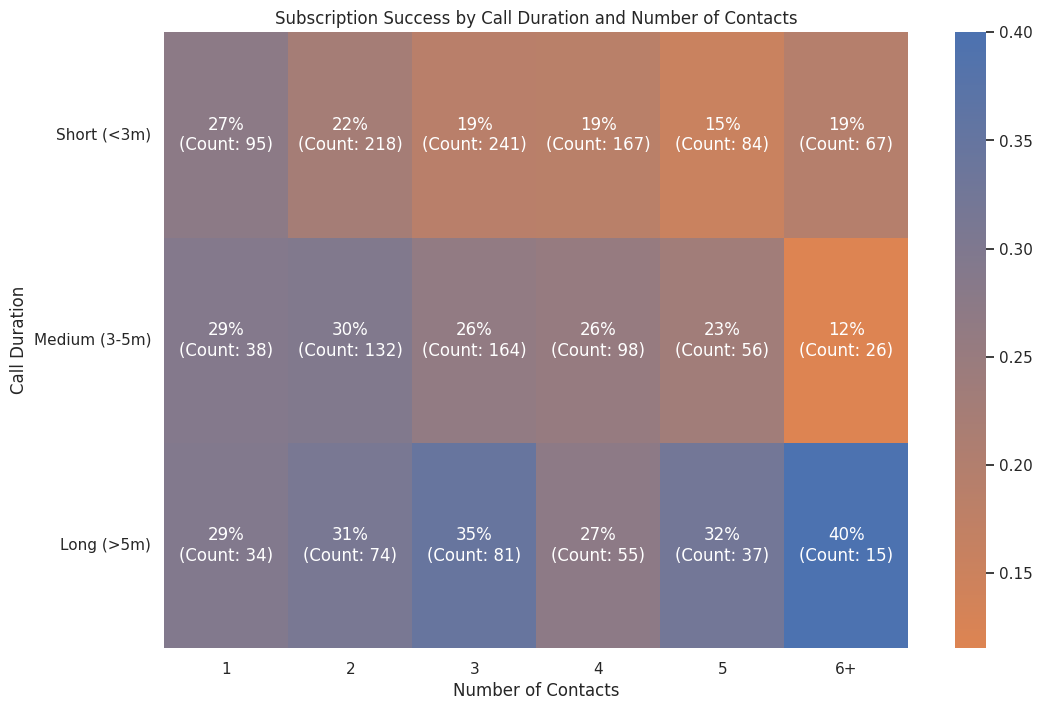

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1 Loading data
df = pd.read_csv('cleaned_marketing_data.csv')

#2 Fixing contacts column
# Define a function to bin contact frequencies into specific levels (1-5) and a '6+' group
def fix_contacts(x):
    if x < 6:
      return str(int(x))
    else:
        return "6+"

# Applying the function to create a new column
df['contact_group'] = df['Contacts_This_Campaign'].apply(fix_contacts)

#3 Grouping the call duration
# Grouping into the 3 parts as 0-3 mins, 3-5 mins, and 5+ mins
bin_size = [0, 180, 300, 600]
label_name = ['Short (<3m)', 'Medium (3-5m)', 'Long (>5m)']

df['duration_group'] = pd.cut(df['Call_Duration_Sec'],
                              bins=bin_size,
                              labels=label_name)

#4 Creating pivot tables to create a heatmap
# One table for the colors to represent mean and one for the text to represent count
# Listing strings manually to ensure they are not sorted alphabetically
col_order = ['1', '2', '3', '4', '5', '6+']

# Table 1: Success Rate (Subscribed = 1)
table_rate = df.pivot_table(index='duration_group',
                            columns='contact_group',
                            values='Subscribed',
                            aggfunc='mean')
table_rate = table_rate[col_order]

# Table 2: Number of people (Count)
table_count = df.pivot_table(index='duration_group',
                             columns='contact_group',
                             values='Subscribed',
                             aggfunc='count')
table_count = table_count[col_order]

#5 Creating text labels for boxes
# Loop through rows and columns to combine Rate and Count
box_text = []

for i in range(len(table_rate)):
    row_text = []
    for j in range(len(table_rate.columns)):

        # Get the values from the pivot tables
        rate = table_rate.iloc[i, j]
        count = table_count.iloc[i, j]

        # Format label to show rate and count
        label = f"{rate:.0%}\n(Count: {int(count)})"
        row_text.append(label)

    # Add the row to the main list
    box_text.append(row_text)

#6 Making the plot
plt.figure(figsize=(12, 8))

# Create custom colormap and plot heatmap
color = sns.blend_palette(
   [sns.color_palette("deep")[1],
    sns.color_palette("deep")[0]],
    as_cmap=True)

sns.heatmap(table_rate,
            annot=box_text,
            fmt='',
            cmap=color,
            linewidths=0)

#7 Adding titles
plt.title('Subscription Success by Call Duration and Number of Contacts', fontsize=12)
plt.xlabel('Number of Contacts')
plt.ylabel('Call Duration')
plt.yticks(rotation=0) # Making y-labels horizontal

plt.show()

3. How does customer subscription rely on customer age, account balance and customer credit score?

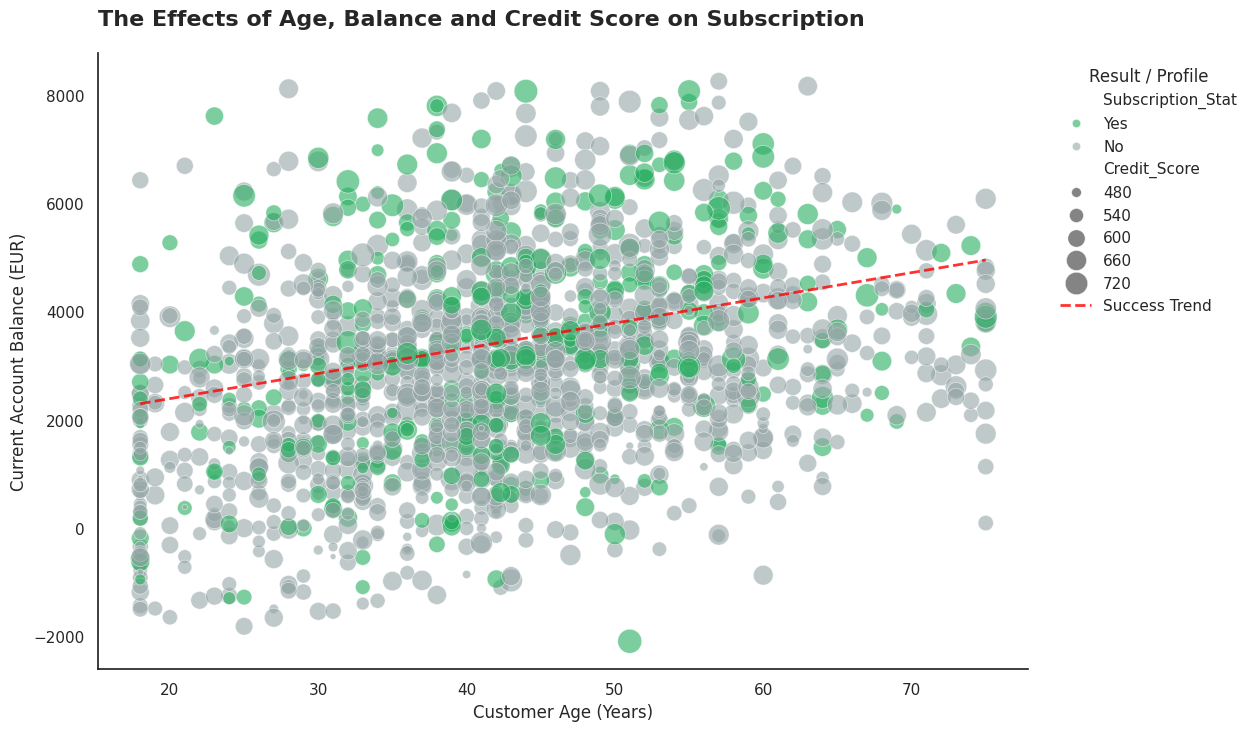

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Importing the data
df = pd.read_csv('cleaned_marketing_data.csv')

# 2. Setting the style
sns.set_style("white")
plt.figure(figsize=(12, 8))
#3. Creating a new column to show subscription status as yes and no instead of 1.0 and 0.0
df['Subscription_Stat'] = df['Subscribed'].replace({1.0: 'Yes', 0.0: 'No'})

# 3. Creating the scatter plot
# hue: color(subscription status, yes/no), size: Point size (Credit score)
scatter = sns.scatterplot(
    data=df,
    x='Age',
    y='Balance_Eur',
    hue='Subscription_Stat',
    size='Credit_Score',
    palette={'No': '#95a5a6', 'Yes': '#27ae60'},
    alpha=0.6, # opacity
    sizes=(15, 300), # Differentiate the size
    edgecolor='w', # White frames around the circles
    linewidth=0.5)

# 4. TREND LINE (Calculating using numpy)
# calculating the successes (Subscribed=1)
success_df = df[df['Subscribed'] == 1]
z = np.polyfit(success_df['Age'], success_df['Balance_Eur'], 1)
p = np.poly1d(z)
# Drawing the trend line
plt.plot(df['Age'].sort_values(), p(df['Age'].sort_values()), color='red', linestyle='--', alpha=0.8, label='Success Trend', linewidth=2)

# 5. Design
plt.title('The Effects of Age, Balance and Credit Score on Subscription', fontsize=16, fontweight='bold', loc='left', pad=20)
plt.xlabel('Customer Age (Years)', fontsize=12)
plt.ylabel('Current Account Balance (EUR)', fontsize=12)

# Taking the legend out
plt.legend(title='Result / Profile', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Cleaning the frames
sns.despine()

# 6. Save
plt.savefig('scatter112.png', dpi=300, bbox_inches='tight')
plt.show()

3. How does the relationship between Age and Income vary by Education Level?

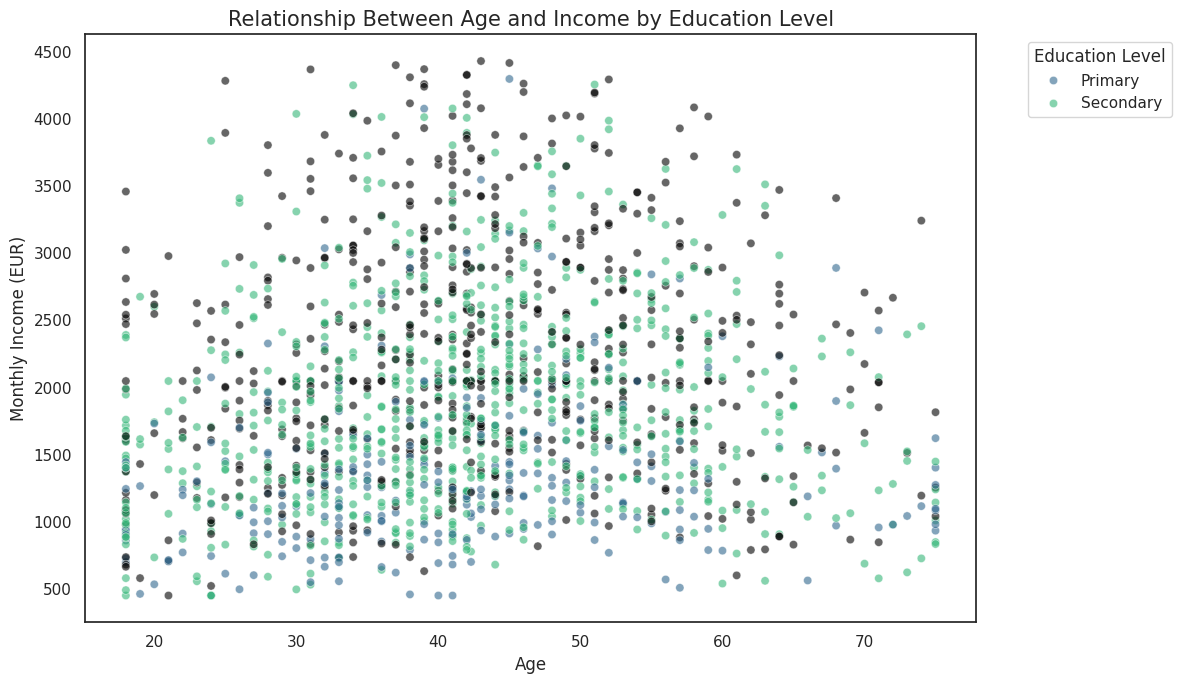

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_marketing_data.csv')

# Set the figure size
plt.figure(figsize=(12, 7))

# Define the logical order for education levels
edu_order = ['Primary', 'Secondary', 'High School', 'University', 'Master', 'PhD']

# Filter the order list to include only education levels present in the current dataframe

existing_order = [e for e in edu_order if e in df['Education'].unique()]

# Create a Scatter Plot to visualize the relationship
# x-axis: Age
# y-axis: Average Monthly Income
# hue: Education
sns.scatterplot(
    data=df,
    x='Age',
    y='avg_monthly_income_eur',
    hue='Education',
    hue_order=existing_order, # Apply the sorted order
    alpha=0.6, # Set transparency to see overlapping points
    palette='viridis' # Use a colorblind-friendly palette
)

# Title and label axis
plt.title('Relationship Between Age and Income by Education Level', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Monthly Income (EUR)', fontsize=12)

# Move the legend outside the plot area to prevent covering data points
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels or legend
plt.tight_layout()

# Display the plot
plt.show()